In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [197]:
%matplotlib inline

In [198]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [199]:
data = pd.read_csv('myntra_train_dataset.csv')

In [200]:
data=data.fillna(method='ffill')
data.columns


Index(['Brand', 'Category', 'Gender', 'Color', 'Link_to_the_image',
       'Sub_category'],
      dtype='object')

In [201]:
kind =['Men', 'Women', 'Girls', 'Unisex', 'Boys']

In [202]:
sub =['Graphic', 'Biker', 'Striped', 'Colourblocked', 'Tie and Dye',
       'Solid', 'Typography', 'Geometric', 'Camouflage', 'Abstract',
       'Tribal', 'People and Places', 'Conversational', 'Sports', 'Floral',
       'Humour and Comic', 'Music', 'Checked', 'Self Design', 'Varsity',
       'Sports and Team Jersey', 'Polka Dots', 'Superhero',
       'Horizontal Stripes']

In [203]:
brand =['Roadster', 'Roadster Fast and Furious', 'Riverstone', 'Riot',
       'Rinascimento', 'Rigo', 'Rider Republic', 'Richlook', 'Rham',
       'Restless', 'Republic of Spiel', 'Replay', 'Renka', 'Reebok',
       'Reebok Classic', 'Redwolf', 'Red Tape', 'Real Madrid', 'Raymond',
       'Rattrap', 'Rajesh Pratap Singh', 'RUFF', 'RSVP Cross', 'ROUTE 66',
       'ROOTSTOCK', 'RODID', 'ROCX', 'RIG', 'RIDRESS', 'REVO', 'RDSTR',
       'R&C', 'Quiksilver', 'QUIZ', 'Push & Pull', 'Purple Feather',
       'Pure Play', 'Punkster', 'Punisher', 'Puma', 'Proline',
       'Proline Active', 'Probase', 'Private Lives', 'PrettySecrets',
       'Posterboy', 'PostFold', 'Polo Ralph Lauren', 'Pokemon', 'Pluto',
       'Pluie', 'Playboy', 'Platinum League', 'Planet Superheroes',
       'Pirates of the Caribbean', 'Pique Republic', 'Pink Floyd',
       'Phosphorus', 'Peter England', 'Peter England Elite',
       'Peter England Casuals', 'Pepito', 'Pepe Jeans', 'People',
       'Peanuts', 'Peach Boy', 'Parx', 'Park Avenue', 'Park Avenue Woman',
       'Palm Tree', 'Paani Puri', 'PURYS', 'PUNK', 'POPPERS by Pantaloons',
       'PERF', 'Oxolloxo', 'Oshea', 'Original Penguin', 'Orange Valley',
       'Oner', 'Okane', 'Obidos', 'OVS', 'OPt', 'ONN', 'ONLY',
       'ONLY & SONS', 'ODAKA', 'Nuteez', 'Numero Uno', 'NuBella',
       'Northern Lights', 'North Coast', 'Nord51', 'Noi', 'Noble Faith',
       'Nirvana', 'Nino Bambino', 'Ninja Turtle', 'Nineteen', 'Nike',
       'New Look', 'New Balance', 'Nautica', 'Nauti Nati', 'NUSH',
       'NU ECO', 'NO.99', 'NEVA', 'NBA', 'Mysin', 'Myntra',
       'My Little Lambs', 'My Lil Berry', 'Music', 'Mufti', 'Ms.Taken',
       'Mr. Men', 'Mr. Men Little Miss', 'Mr Bowerbird', 'Motu Patlu',
       'Mossimo', 'Monteil & Munero', 'Monte Carlo', 'Moda Rapido',
       'Moda Rapido Star Wars', 'Moda Rapido Marvel', 'Moda Rapido Disney',
       'Mizuno', 'Miss Grace', 'Miss Chick', 'Miss Chase', 'Miss Alibi',
       'Miso', 'Minnie', 'Minnie Mouse', 'Minions',
       'Minions by Kook N Keech', 'Mickey', 'Mickey & Friends',
       'Metersbonwe', 'Meish', 'Meiro', 'Meira', 'Meee', 'Mast & Harbour',
       'Maserati', 'Masculino Latino', 'Marvel', 'Marvel Spiderman',
       'Marvel Comics', 'Marvel Avengers', 'Martini', 'Marks & Spencer',
       'Marie Claire', 'Manola', 'Mango Kids', 'Manchester City FC',
       'Man of Steel', 'Maine', 'Madlove', 'Madame', 'MTV', 'MR BUTTON',
       'MOXI', 'MIWAY', 'MINI KLUB', 'MELTIN', 'MARD', 'MANGO',
       'Love Genration', 'Louis Philippe', 'Louis Philippe Sport',
       'Louis Philippe Jeans', 'Lotto', 'Looney Tunes', 'Lonsdale',
       'London Bridge', 'London Bee', 'Loco En Cabeza',
       'Liverpool Football Club UK', 'Liverpool FC', 'Lilliput',
       'LilPicks', 'Lil Tomatoes', 'Lil Orchids', 'Levis', 'Leo',
       'Leo Sansini', 'Lee', 'Lee Cooper', 'Le Bison', 'Lawman pg3',
       'Latin Quarters', 'Lacoste', 'Label Ritu Kumar', 'Laabha',
       'LOVE GEN', 'LOCOMOTIVE', 'LINKIN PARK', 'L.A. SEVEN', 'Kylo Ren',
       'Kung Fu Panda', 'Kulture Shop', 'Kraus Jeans', 'Kook N Keech',
       'Kook N Keech Star Wars', 'Kook N Keech Pokemon',
       'Kook N Keech Music', 'Kook N Keech Marvel',
       'Kook N Keech Garfield', 'Kook N Keech Disney',
       'Kook N Keech Archie', 'Kiwi', 'Killer', 'Kids Ville', 'Kazo',
       'Karrimor', 'Karma', 'Kappa', 'Kapapai', 'Kanvin', 'Kangol',
       'KULTPRIT', 'KOLKATA KNIGHT RIDERS', 'KAARYAH', 'Justice League',
       'Justanned', 'Juniors by Lifestyle', 'Joshua Tree', 'Joker',
       'Johnny Bravo', 'John Pride', 'John Players', 'John Miller',
       'John Miller Hangout', 'Jogur', 'Jockey', 'Jn Joy', 'Jimi Hendrix',
       'Jhonny Bravo', 'Jeep', 'Jealous 21', 'Jazzup', 'Jack & Jones',
       'JUSTICE', 'JUNAROSE', 'JM Sport', 'JAINISH', 'Izinc', 'Iron Man',
       'Integriti', 'Inmark', 'Inego', 'Indigo Nation',
       'Indigo Nation Street', 'Indian Terrain', 'Incynk', 'Incult',
       'Imagica', 'IZOD', 'INVICTUS', 'INDICODE', 'IDK', 'IDENTITI', 'ICC',
       'I AM FOR YOU', 'Hypernation', 'Hulk', 'Huetrap', 'Hubberholme',
       'House of Chase', 'Hot Wheels', 'Hook & Eye', 'Honey by Pantaloons',
       'Hols', 'Henry and Smith', 'Hello Kitty', 'Heart 2 Heart',
       'Harvard', 'Harry Potter', 'Harley-Davidson', 'Happy Hippie',
       'Hangup', 'Hanes', 'HUSTLE', 'HUNGOVER', 'HRX by Hrithik Roshan',
       'HIGHLANDER', 'HERE&NOW', 'HALO 5', 'H.E. By Mango', 'Guns & Roses',
       'Guardians of the Galaxy', 'Greenwich United Polo Club',
       'Green Day', 'Goofy', 'Go-Art', 'Gmcks', 'Globus', 'Globe',
       'Globalite', 'Global Desi', 'Gini and Jony', 'Ginger by Lifestyle',
       'Gesture Jeans', 'Garfield', 'Garcon',
       'Game of Thrones by Kook N Keech', 'Game Of Thrones', 'Gabi',
       'GUESS', 'GRITSTONES', 'GRAIN', 'GOAT', 'GKIDZ', 'GAS', 'GANT',
       'G-STAR RAW', 'Fusion Beats', 'Fugue', 'Frozen',
       'French Connection', 'Free Authority', 'Free & Young',
       'Franco Leone', 'Fox', 'Four One Oh', 'Fort Collins', 'Forever New',
       'Foreign Culture', 'Force NXT', 'Force Go Wear', 'Forca',
       'Flying Machine', 'Firetrap', 'Filmwear', 'FiTZ', 'Ferrari',
       'Feneto', 'Femella', 'Fantastic Beasts',
       'Fantastic Beasts by Kook N Keech', 'Family Guy',
       'Fame Forever by Lifestyle', 'Facit', 'Fabindia', 'FabAlley',
       'FabAlley Curve', 'Fab Deanta', 'FUGAZEE', 'FS Mini Klub', 'FROST',
       'FRITZBERG', 'FREECULTR', 'FREECULTR Express',
       'FOW Friends of Wild', 'FOREVER 21', 'FILA', 'FIFTY TWO',
       'FIFA U-17 WC', 'FCUK', 'FC Barcelona', 'Evoke 1899', 'Everlast',
       'Ethane', 'Espresso', 'Encrypt', 'Emporio Armani', 'Eminem', 'Elle',
       'Elle Kids', 'Eimoie', 'Ed Hardy', 'Ecko Unltd', 'Easies',
       'EVAH LONDON', 'ESPRIT']

In [204]:
rang =['Black', 'Beige', 'White', 'Red', 'Off White', 'Maroon', 'Grey',
       'Grey Melange', 'Cream', 'Coral', 'Blue', 'Teal', 'Olive',
       'Navy Blue', 'Magenta', 'Khaki', 'Coffee Brown', 'Charcoal',
       'Burgundy', 'Brown', 'Yellow', 'Purple', 'Orange', 'Green', 'Multi',
       'Pink', 'Lime Green', 'Turquoise Blue', 'Skin', 'Mustard',
       'Sea Green', 'Peach', 'Mauve', 'Lavender', 'Fluorescent Green',
       'Taupe', 'Rust', 'Rose', 'Bronze', 'Nude', 'Tan', 'Silver', 'Gold',
       'Steel']

In [205]:
data =data[['Brand', 'Gender', 'Color','Sub_category']]

In [206]:
l = sub+rang+kind+brand
len(l)

451

In [207]:
a = range(451)
data= data.replace(l,a)

In [209]:
#data['Gender'].unique()

In [238]:
x = data[['Gender','Color']]
y = data['Sub_category']

In [239]:
from sklearn.neighbors import KNeighborsClassifier
nb = KNeighborsClassifier()
nb.fit(x, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

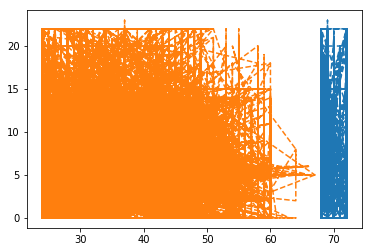

In [240]:
plt.plot(x,y,linestyle='--')

In [241]:
testdata = pd.read_csv('Submission_online.csv')

In [242]:
testdata=testdata.fillna(method='ffill')

In [243]:
testdata = testdata[['Brand', 'Gender', 'Color','Sub_category']]

In [244]:
#testdata['Brand'].unique()

In [245]:
ex =['Allen Solly', 'Celio', 'CULT FICTION', 'Antigravity',
       'Being Human', 'Adamo London', 'Aeropostale', 445, '2GO',
       'American Crew', 'BLEND', 'Difference of Opinion',
       'Cloak & Decker by Monte Carlo', 'De Moza', 'American Swan',
       'Campus Sutra', 'ARISE', 'Adidas', 'Blackberrys', '612 league',
       'Adidas Originals', 'Cherymoya', 'BONATY', 'Alibi',
       'Aventura Outfitters', 'Arrow Sport', 'Ajile by Pantaloons',
       'Breakbounce', 'Dreamszone', 'Baby League', 'Antony Morato',
       'CANDIES by Pantaloons', 'Allen Solly Junior', 'Dream of Glory Inc',
       'Bells and Whistles', 'DC', 'Duke', 'Adidas NEO', 'Basics',
       'Bamboo Tribe', 'Cars', 'Blue Saint', 'Alcis', 'Classic Polo',
       'CHALK by Pantaloons', 'Duke Stardust', 'DressBerry', 'ELABORADO',
       'Alba', '883 Police', 'CAT', 'Beebay', 'Aliep', 'Design Classics',
       'Bossini', 'Converse', 'Blue Giraffe', 'Burnt Umber', 'Dunlop',
       'Columbia', 'Cantabil', 'ColorPlus', 'BAY ISLAND',
       'Automobili Lamborghini', 'Dazzgear', 'Crocodile', 'BOSS Green',
       'Batman', 'Atorse', 'Delhi daredevils by Raw Clothing',
       'CAPTAIN AMERICA', 'Club York', 'DENNISON', 'Barcelona', 'AFYLISH',
       'BYFORD by Pantaloons', 'DEEZENO', 'Deal Jeans', 'Alley Men',
       'Dida Sportswear', 'Boohoo', 'ADRO', 'Disney',
       'Cotton County Premium', 'Design Roadies', 'Dexters Laboratory',
       'Barbie', 'Blotch', '2go ACTIVE GEAR USA', 'Calvin Klein Jeans',
       'Calgari', 'BOSS Orange', 'Disney by DressBerry',
       'Arrow Blue Jean Co.', 'Doors', 'Camey',
       'Chirpie Pie by Pantaloons', 'ALCOTT', 'Diadora', 'D-Green',
       'Colors Couture', 'Coolyug', 'ALTOMODA by Pantaloons', '20Dresses',
       'Champion', 'CaptainKYSO', 'ASICS', '612 Ivy League', 'Avoir Envie',
       'Benxeen', 'Do u speak green', 'Chumbak', 'Crimsoune Club',
       'Disney Cars', 'Arrow New York', 'Bob Marley', 'Beatles',
       'Desigual', 'Affliction', 'Avengers', 'Bedazzle', 'Admiral',
       'Amari West', 'AUDAZ', 'B SPORTS', 'DONEAR NXG', 'ATTIITUDE',
       'Cation', 'BRZEE', 'Bombay High', 'DERBY JEANS COMMUNITY', 'Arcley',
       'Dollar Missy', 'CODE by Lifestyle', 'CLST', 'BARE', 'Crusoe',
       'Chemistry', 'Dawn of Justice', 'Chromozome', 'Darth Vader',
       'Blu MNKY', 'DC Comics', 'COVER STORY', 'DOROTHY PERKINS', 'CALAE',
       'Donnay', 'Canary London', 'Cherry Crumble', 'Bio Kid', 'Da Intimo',
       'A Little Fable', '612FEARLESS', 'Arrow', 'Doctor Who', 'AND',
       'American Eye', 'ATIVO', 'CHE GUEVARA', 'CHILL WINSTON',
       'Daniel Hechter', '27 Ashwood', 'Bat Girl', 'Cherokee',
       'Breaking Bad', 'Black Sabbath', 'BUKKUM', 'C9', 'Avirate',
       'Allen Solly Woman', 'Ama Bella', 'Donald Duck', 'DXI',
       'Blue Harbour', 'Call of Duty', 'Bruun & Stengade', '9 yrs younger',
       'Clovia', 'Allen Solly Kids', 'ARMR', 'Comedy Central',
       'Brooks Brothers', 'Arrow Woman', 'DARK KNIGHT', 'Chicco', 'EETEE',
       'Bewakoof', 'Amante', 'Ashworth', 'Deadpool', '7 For All Mankind',
       'Anasazi', 'Domyos', 'Cartoon Network', 'ACDC', 'Donald',
       'Dhruv Kapoor']

In [246]:
len(ex)
p = range(452,649)
testdata = testdata.replace(l,a)

In [247]:
testdata = testdata.replace(ex,p)

In [249]:
xtest = testdata[['Gender','Color']]

In [250]:
ytest = nb.predict(xtest)

In [251]:
ytest

array([22,  2,  5, ..., 22,  5,  5], dtype=int64)

In [252]:
for i in ytest:
    print(sub[i])

Superhero
Striped
Solid
Graphic
Solid
Superhero
People and Places
Typography
Solid
Solid
Solid
Striped
Solid
Solid
Solid
Striped
Solid
Solid
Typography
Solid
Solid
People and Places
Typography
Striped
Floral
Solid
Solid
Striped
Striped
Graphic
Solid
Striped
Graphic
Solid
Solid
Typography
Striped
Typography
Solid
Solid
Graphic
People and Places
Solid
Solid
Typography
Graphic
Solid
Striped
Colourblocked
Graphic
Solid
People and Places
Typography
Striped
Striped
Typography
Striped
Solid
Striped
Biker
Solid
Solid
Colourblocked
Striped
Solid
Striped
Striped
Solid
Typography
Typography
Typography
Solid
Solid
Abstract
Superhero
Typography
Solid
Solid
Solid
Solid
Striped
Typography
Solid
Solid
Humour and Comic
Solid
People and Places
Solid
Solid
Solid
Striped
Solid
Striped
Striped
Solid
Superhero
Solid
Solid
Typography
Striped
Solid
Typography
Graphic
Striped
Striped
Striped
Graphic
Typography
Solid
Solid
Solid
Floral
Typography
People and Places
Striped
People and Places
Graphic
Colourblocked

Striped
Solid
Striped
Solid
Solid
Superhero
Superhero
Typography
Typography
Solid
Striped
Solid
Solid
Striped
Graphic
Striped
Solid
Solid
Solid
Striped
Solid
Typography
Solid
Graphic
Solid
Striped
Colourblocked
Biker
Solid
Striped
Typography
Solid
Solid
Solid
Striped
Typography
Solid
Graphic
Solid
Striped
Striped
Solid
Solid
Striped
Striped
Solid
Graphic
Striped
Solid
Solid
Striped
Striped
Solid
Solid
Solid
Striped
Typography
Solid
Striped
Solid
Graphic
Striped
Typography
Solid
Solid
Striped
Solid
Typography
Superhero
Striped
Typography
Solid
Solid
Solid
Striped
Typography
Superhero
Striped
Superhero
Typography
Typography
Striped
Solid
Striped
Floral
Striped
Typography
People and Places
Solid
Typography
Solid
Solid
Striped
Solid
Solid
Striped
Graphic
Graphic
Biker
Biker
Striped
Solid
Striped
Striped
Typography
Striped
Solid
Typography
Striped
Typography
Striped
Solid
Solid
Solid
Striped
Solid
Solid
Solid
Typography
Solid
Solid
Typography
Solid
Solid
Solid
Striped
Striped
Striped
Stripe

Solid
Solid
Graphic
Typography
Typography
Solid
Abstract
Typography
Typography
Typography
Solid
Striped
Solid
Solid
Solid
Striped
Solid
Solid
Solid
Solid
Typography
People and Places
Solid
Solid
Graphic
Striped
Solid
Solid
Solid
Typography
Typography
Solid
Striped
Typography
Typography
Solid
Solid
Solid
Superhero
Typography
Tie and Dye
Solid
Solid
Striped
Striped
Solid
Solid
Solid
Striped
Solid
Striped
Solid
Solid
Superhero
Typography
Colourblocked
Solid
People and Places
Solid
Striped
Solid
Solid
Solid
Solid
Solid
Solid
Solid
Striped
Striped
Typography
Solid
Striped
Typography
Solid
Superhero
Striped
Solid
Solid
Typography
Solid
Solid
Solid
Typography
Typography
People and Places
Solid
Striped
Striped
Superhero
Striped
Abstract
Solid
Solid
Solid
People and Places
Graphic
Striped
Striped
Solid
Solid
Solid
Striped
Typography
Solid
Floral
Solid
Striped
Solid
Typography
Striped
Solid
Striped
Graphic
Striped
Striped
Typography
Striped
Solid
Solid
Striped
Solid
Solid
Striped
Typography
Supe

Solid
Biker
Striped
Striped
Solid
Typography
Solid
Typography
Solid
Solid
Striped
Striped
Solid
Solid
Typography
Solid
Solid
Striped
Biker
Striped
Solid
Graphic
Solid
Solid
Solid
Typography
Typography
Solid
Solid
Superhero
Solid
Typography
Solid
Solid
Striped
Solid
Superhero
Striped
Striped
Solid
Typography
Typography
Solid
Solid
Striped
Typography
Superhero
Biker
Striped
Solid
Striped
Graphic
Typography
Solid
Solid
Striped
Striped
Solid
Solid
Typography
Typography
Solid
Striped
Solid
Typography
Typography
Solid
Typography
Solid
People and Places
Typography
Striped
Solid
Typography
Typography
Striped
Solid
Solid
Solid
Solid
Striped
Solid
Solid
Solid
Solid
Solid
Solid
Solid
Striped
Superhero
Solid
Striped
Solid
Solid
Solid
Striped
Striped
Solid
Typography
Solid
Solid
Striped
Typography
Striped
Striped
Solid
Graphic
Solid
Graphic
Typography
Solid
Graphic
Solid
Solid
Typography
Typography
Striped
Superhero
Solid
Typography
Striped
Solid
Humour and Comic
Solid
Solid
Typography
Striped
Typo

Striped
People and Places
Striped
Typography
Striped
Striped
Solid
Solid
Typography
Striped
Typography
Colourblocked
Striped
Solid
Solid
Superhero
Typography
Solid
People and Places
Striped
Solid
Graphic
Striped
Striped
Striped
Typography
Striped
Graphic
Striped
Floral
Solid
Typography
Solid
Solid
Typography
Striped
Solid
Colourblocked
Striped
Solid
Solid
Striped
Solid
Typography
Solid
Solid
Striped
Solid
People and Places
Solid
Solid
Solid
Typography
Superhero
People and Places
Solid
Typography
Striped
Striped
Solid
Typography
Solid
Solid
Solid
Solid
Striped
Solid
Graphic
Typography
Solid
People and Places
People and Places
Solid
Solid
Typography
Typography
Solid
Solid
Striped
Solid
Solid
Striped
Solid
Typography
Solid
Striped
Solid
Solid
Striped
Solid
Striped
Typography
Striped
Solid
Striped
Typography
Striped
Solid
Solid
Solid
Solid
People and Places
Solid
Solid
Typography
Solid
Solid
Solid
Solid
Striped
Colourblocked
Solid
Superhero
Striped
Superhero
Colourblocked
Solid
Solid
Solid

Solid
Striped
Striped
Striped
Striped
Solid
Typography
Colourblocked
Striped
Striped
Solid
Solid
Solid
Striped
Striped
Graphic
Solid
Solid
Striped
Superhero
Striped
Solid
Typography
Solid
Striped
Striped
Solid
Striped
Superhero
Striped
Striped
Solid
Striped
Solid
Solid
Solid
Graphic
Solid
Typography
Typography
Striped
Solid
Solid
Solid
Typography
Solid
Typography
Striped
Solid
Striped
Superhero
Solid
Superhero
Solid
Solid
Solid
Solid
Graphic
Striped
Striped
Solid
Solid
Colourblocked
Striped
Solid
Solid
Striped
Solid
Colourblocked
Striped
Striped
Typography
Solid
Typography
Solid
Solid
Solid
Abstract
Solid
Striped
Striped
Striped
Solid
Solid
Striped
Typography
Solid
Solid
Striped
Striped
Solid
Solid
Solid
Solid
Solid
Solid
Solid
Solid
Graphic
Typography
Typography
Striped
Solid
Striped
Typography
Striped
Graphic
Solid
Typography
Solid
People and Places
Typography
People and Places
Typography
Solid
Typography
Colourblocked
Striped
Superhero
Striped
Solid
Solid
Solid
Striped
Striped
Solid

Typography
Striped
Solid
Solid
Striped
Typography
Superhero
Solid
Solid
Typography
Striped
Solid
Graphic
Solid
Superhero
Solid
Solid
Striped
Solid
Typography
Solid
Striped
Typography
Solid
Superhero
Solid
Solid
People and Places
Solid
Solid
Solid
Solid
Striped
Typography
Solid
Solid
Solid
Solid
Solid
Striped
Solid
Graphic
Solid
Superhero
Striped
Solid
Graphic
Striped
Solid
Typography
Striped
Solid
Solid
Solid
Solid
Solid
Typography
Solid
Graphic
Solid
Striped
Solid
Solid
Graphic
Striped
Solid
Striped
Solid
Solid
Solid
Solid
Solid
Solid
Striped
Solid
Solid
Solid
Solid
Colourblocked
Typography
Typography
Solid
Graphic
Striped
Solid
Striped
Solid
Solid
Solid
Solid
Typography
Solid
Striped
Typography
Striped
Typography
Solid
Typography
Solid
Solid
Solid
Typography
Solid
Superhero
Solid
Solid
Solid
Solid
Solid
Solid
Solid
Graphic
People and Places
Solid
Typography
Solid
Solid
Solid
Solid
Solid
Striped
Solid
Striped
Graphic
Solid
Superhero
Striped
Solid
Graphic
Solid
Striped
Floral
Typograph

Solid
Typography
Superhero
Solid
Typography
Solid
Typography
Solid
Solid
Graphic
Solid
Abstract
Striped
Solid
People and Places
People and Places
Solid
Striped
Superhero
Solid
Solid
Biker
Solid
Humour and Comic
Solid
Typography
Solid
Solid
Solid
Typography
Striped
Graphic
Striped
Typography
Striped
Striped
Solid
Graphic
Solid
Typography
Solid
Solid
Solid
Striped
Striped
Solid
Striped
Solid
Striped
Striped
Solid
Typography
Striped
Striped
Solid
Solid
Solid
Superhero
Striped
Solid
Colourblocked
Solid
Solid
Solid
People and Places
Striped
Solid
Typography
Graphic
Solid
Typography
Solid
Striped
Solid
Superhero
Solid
Striped
Striped
Solid
Striped
Superhero
Solid
Striped
Solid
Striped
Abstract
Striped
Typography
Abstract
Typography
Superhero
Striped
Striped
Biker
Solid
Striped
Striped
Solid
People and Places
Solid
Solid
Solid
Solid
Striped
Striped
Typography
Solid
Striped
Biker
Typography
Solid
Striped
Solid
Solid
Solid
Striped
Typography
Striped
Solid
Solid
Striped
Striped
Typography
Stripe

Solid
Striped
Striped
Solid
Typography
Striped
Typography
Solid
Typography
Solid
Striped
Striped
Striped
Solid
Striped
Typography
Solid
Solid
Striped
Solid
Striped
Solid
Striped
Striped
Solid
Striped
Solid
Typography
Striped
Solid
Striped
Solid
Superhero
Graphic
Solid
Striped
Striped
Solid
People and Places
Typography
Striped
Solid
Striped
Striped
Typography
People and Places
Superhero
Striped
Solid
Typography
Striped
Solid
Striped
Colourblocked
Typography
Typography
Solid
Floral
Typography
Solid
Solid
Solid
Solid
Striped
Solid
Solid
Solid
Striped
Solid
Solid
Striped
Striped
Striped
Solid
Striped
Solid
Solid
Superhero
Solid
Solid
Superhero
Typography
Typography
Solid
Solid
Striped
Colourblocked
Solid
Solid
Striped
Solid
Typography
Striped
Superhero
Striped
Striped
Solid
Striped
Superhero
Striped
Solid
Typography
Solid
Graphic
Solid
Striped
Solid
Solid
Striped
Typography
Solid
Solid
Typography
Striped
Solid
Solid
Typography
People and Places
Striped
Striped
Solid
Superhero
Striped
Typog

Solid
Solid
Superhero
Solid
Striped
Typography
Striped
Striped
Typography
Typography
Solid
Typography
Solid
Solid
Typography
Striped
Solid
Solid
Striped
Solid
Striped
Graphic
Solid
Striped
Solid
Striped
Striped
Typography
Typography
Solid
Solid
Typography
Striped
Solid
Striped
People and Places
Solid
Solid
Superhero
People and Places
Solid
Superhero
Solid
Solid
Solid
Solid
Typography
Striped
Striped
Solid
Superhero
Typography
Solid
Solid
Superhero
Solid
Typography
Solid
Superhero
Superhero
Solid
Solid
Typography
Solid
Striped
Striped
Graphic
Solid
Typography
Graphic
Solid
Solid
Solid
Striped
Biker
Graphic
Solid
Solid
Striped
Superhero
Typography
Typography
Solid
Typography
Typography
Solid
Solid
Striped
Superhero
Striped
Solid
Solid
Tie and Dye
Solid
Solid
Superhero
People and Places
Solid
Solid
Solid
Superhero
Solid
Solid
Solid
Striped
Graphic
Solid
Solid
Solid
Solid
Striped
Striped
Solid
Graphic
Solid
Solid
Solid
Colourblocked
Solid
Solid
Typography
Solid
Graphic
Superhero
Solid
Typo